In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as st

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.drop(['education'],axis=1,inplace=True)

In [7]:
df.rename(columns={'male':'sex'},inplace = True)
df.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
#Counting the missing values and dropping them
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

df.dropna(axis=0,inplace=True)

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [13]:
df.isnull().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
new_features=df[['age','sex','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
X=new_features.iloc[:,:-1]
Y=new_features.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.2346638 ,  1.11635803, -0.75542723, -0.94055126, -1.19578906,
        -0.20444626],
       [-0.41768745, -0.89576997, -0.75542723,  0.2925091 , -0.51548639,
        -0.24631379],
       [-0.18426563,  1.11635803,  0.92230547,  0.18041271, -0.22068857,
        -0.49751902],
       [ 1.33297616, -0.89576997,  1.76117182, -0.26797288,  0.79976544,
         0.88410973],
       [-0.41768745, -0.89576997,  1.17396538,  1.07718388, -0.10730479,
         0.13049405]])

In [74]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.05, solver='lbfgs').fit(train_X, train_Y)
LR

LogisticRegression(C=0.05)

In [76]:
yhat = LR.predict(test_X)

In [78]:
from sklearn.metrics import jaccard_score
print(jaccard_score(test_Y, yhat, pos_label=0))

0.8692722371967655


In [80]:
from sklearn.metrics import confusion_matrix
import scipy.optimize as opt

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_Y, yhat, labels=[1,0]))

[[  8  95]
 [  2 645]]


Confusion matrix, without normalization
[[  8  95]
 [  2 645]]


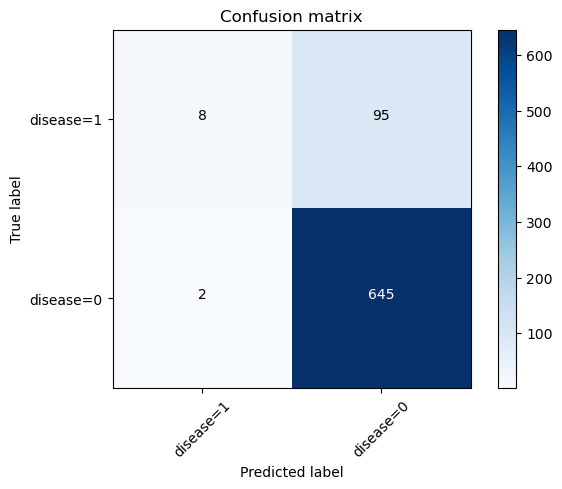

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disease=1','disease=0'],normalize= False,  title='Confusion matrix')

In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y, yhat))

0.8706666666666667
